In [44]:
import torch

In [144]:
import matplotlib.pyplot as plt

In [100]:
# optimizer.zero_grad()
# optimizer.step()
# scheduler.step()

In [272]:
class Scheduler:
    def __init__(self, scheduler):
        self.scheduler = scheduler
        self.lr_history = []
        self.name = self.scheduler.__class__.__name__
    
    def get_lr(self):
        return self.scheduler.optimizer.state_dict()['param_groups'][0]['lr']
    
    def iterate(self, iterations):
        self.lr_history.append(self.get_lr())
        if self.name in ['ReduceLROnPlateau']:
            for i in range(iterations):
                self.scheduler.step(0) # simulate constant loss
                self.lr_history.append(self.get_lr())
        else:
            for i in range(iterations):
                self.scheduler.step()
                self.lr_history.append(self.get_lr())

In [273]:
class SchedulerBuilder:
    def __init__(self):
        self.max_iter = 10000
        self.default_lr = 1e-3
        
        self.schedulers_params = self.get_schedulers_params()
        self.supported_schedulers = self.get_supported_schedulers()
        
    def get_schedulers_params(self):
        return {
            'CosineAnnealingLR': [
                {
                    'param': 'T_max',
                    'type': 'int',
                    'min': 1,
                    'default': self.max_iter
                },
                {
                    'param': 'eta_min ',
                    'type': 'float',
                    'min': 0.0,
                    'max': 1.0,
                    'default': 0.0
                },
                {
                    'param': 'last_epoch',
                    'type': 'int',
                    'min': -1,
                    'max': self.max_iter,
                    'default': -1
                },
            ],
#             'CyclicLR': [
#                 {
#                     'param': 'base_lr',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': self.default_lr
#                 },
#                 {
#                     'param': 'max_lr',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 1.0
#                 },
#                 {
#                     'param': 'step_size_up',
#                     'type': 'int',
#                     'min': 1,
#                     'max': self.max_iter,
#                     'default': 2000
#                 },
#                 {
#                     'param': 'step_size_down',
#                     'type': 'int',
#                     'min': 1,
#                     'max': self.max_iter,
#                     'default': 2000
#                 },
#                 {
#                     'param': 'mode',
#                     'type': 'str',
#                     'optioms': ['triangular', 'triangular2', 'exp_range'],
#                     'default': 'triangular'
#                 },
#                 {
#                     'param': 'gamma',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 1.0
#                 },
#                 {
#                     'param': 'base_momentum',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 0.8
#                 },
#                 {
#                     'param': 'max_momentum',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 0.9
#                 },
#                 {
#                     'param': 'last_epoch',
#                     'type': 'int',
#                     'min': -1,
#                     'max': self.max_iter,
#                     'default': -1
#                 },
                
#             ],
            'ReduceLROnPlateau': [
                {
                    'param': 'factor',
                    'type': 'float',
                    'min':0.0,
                    'max': 1.0,
                    'default': 0.1
                },
                {
                    'param': 'patience',
                    'type': 'int',
                    'min': 0,
                    'max': self.max_iter,
                    'default': 10
                },
                {
                    'param': 'min_lr',
                    'type': 'float',
                    'min':0.0,
                    'max': 1.0,
                    'default': 0.0
                },
                {
                    'param': 'eps',
                    'type': 'float',
                    'min':0.0,
                    'max': 1.0,
                    'default': 1e-8
                },
            ],
            'ExponentialLR': [
                {
                    'param': 'gamma',
                    'type': 'float',
                    'min':0.0,
                    'max': 1.0,
                    'default': 0.9
                },
                {
                    'param': 'last_epoch',
                    'type': 'int',
                    'min': -1,
                    'max': self.max_iter,
                    'default': -1
                },
            ],
            'MultiStepLR': [
                {
                    'param': 'milestones',
                    'type': 'list',
                    'default': [30, 80]
                },
                {
                    'param': 'gamma',
                    'type': 'float',
                    'min':0.0,
                    'max': 1.0,
                    'default': 0.1
                },
                {
                    'param': 'last_epoch',
                    'type': 'int',
                    'min': -1,
                    'max': self.max_iter,
                    'default': -1
                },
            ],
#             'OneCycleLR': [
#                 {
#                     'param': 'max_lr',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 1.0
#                 },
#                 {
#                     'param': 'total_steps',
#                     'type': 'int',
#                     'min': 0,
#                     'max': self.max_iter,
#                     'default': 1000
#                 },
#                 {
#                     'param': 'pct_start',
#                     'type': 'float',
#                     'min':0.1,
#                     'max': 0.9,
#                     'default': 0.3
#                 },
# #                 {
# #                     'param': 'anneal_strategy',
# #                     'type': 'str',
# #                     'optioms': ['cos', 'linear'],
# #                     'default': 'cos'
# #                 },
#                 {
#                     'param': 'base_momentum',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 0.85
#                 },
#                 {
#                     'param': 'max_momentum',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 0.95
#                 },
#                 {
#                     'param': 'div_factor',
#                     'type': 'float',
#                     'min':0.0,
#                     'max': 1.0,
#                     'default': 1e-4
#                 },
#                 {
#                     'param': 'last_epoch',
#                     'type': 'int',
#                     'min': -1,
#                     'max': self.max_iter,
#                     'default': -1
#                 },
                
#             ],
            'StepLR': [
                {
                    'param': 'step_size',
                    'type': 'int',
                    'min': 1,
                    'max': self.max_iter,
                    'default': 5
                },
                {
                    'param': 'gamma',
                    'type': 'float',
                    'min':0.0,
                    'max': 1.0,
                    'default': 0.1
                },
                {
                    'param': 'last_epoch',
                    'type': 'int',
                    'min': -1,
                    'max': self.max_iter,
                    'default': -1
                },
            ],
        }
    
    def get_supported_schedulers(self):
        return list(self.schedulers_params.keys()) 
    
    def check_scheduler_name(self, name):
        if name not in self.supported_schedulers:
            raise Exception('This scheduler is not supported. Pick one of:', self.supported_schedulers)
    
    def get_scheduler_params(self, name):
        self.check_scheduler_name(name)        
        return self.schedulers_params[name]
    
    def parse_params(self, obj):
        s = ''
        for i in obj.keys():
            s += i + '=' + str(obj[i]) + ','
        
        return s[:-1]
        
    def get_scheduler(self, name, params):
        self.check_scheduler_name(name)
        model = torch.nn.Linear(1, 1) # dummmy model
        optimizer = torch.optim.Adam(model.parameters()) # dummy optimizer
        
        params = self.parse_params(params)
        d = {'torch': torch,
            'optimizer': optimizer}
        code = 'scheduler = torch.optim.lr_scheduler.{}(optimizer, {})'.format(name, params)        
        exec(code, d)
        scheduler = d['scheduler']
                
        return Scheduler(scheduler)
        

In [284]:
def test_all_default(iterations=100):
    sched_build = SchedulerBuilder()
    for scheduler_name in sched_build.supported_schedulers:
        print(scheduler_name)
        params = sched_build.get_schedulers_params()[scheduler_name]
        default_params = {}
        for param in params:
            default_params[param['param']] = param['default']
            
#         print(default_params)
        scheduler = sched_build.get_scheduler(scheduler_name, default_params)
        scheduler.iterate(100)
        plt.plot(range(len(scheduler.lr_history)), scheduler.lr_history)
        plt.show()

CosineAnnealingLR


/home/sergey/.local/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


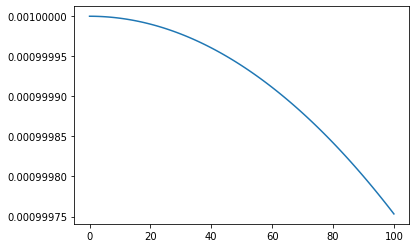

ReduceLROnPlateau


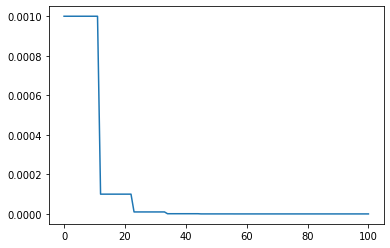

ExponentialLR


/home/sergey/.local/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


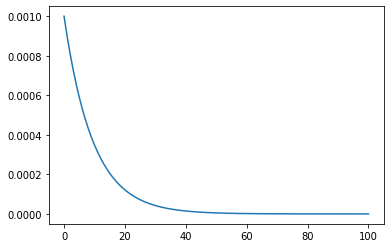

MultiStepLR


/home/sergey/.local/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


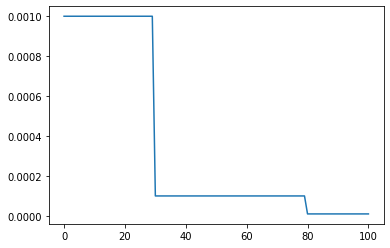

StepLR


/home/sergey/.local/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


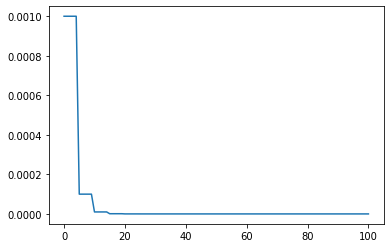

In [285]:
test_all_default()